In [1]:
import matplotlib.pyplot as plt


In [1]:
def main(positions, times): #cm, cs/sec, cm/sec^2
    DIGITS = 2 # round to many decima places
    print("Total Time Interval: " + str(round(totalTime(times),DIGITS)))
    print("Total Distance: " + str(round(distTravelled(positions),DIGITS)))
    print("Average Speed: " + str(round(averageSpeed(positions, times),DIGITS)))
    print("Max Speed: " + str(maxSpeed(positions, times)) + " (time,speed)")
    inc_range, dec_range = accRange(positions,times)
    print("Increasing on the interval: " + str(inc_range))
    print(dec_range)
    print("Average Acceleration Speeding Up: " + str(round(averageAcc(positions, times,inc_range),DIGITS)))
    print("Average Acceleration SLowing Down: " + str(round(averageAcc(positions, times,dec_range),DIGITS)))
    
    
    plt.plot(times,positions)
    plt.ylabel('pos')
    plt.show()
    s = speeds(positions,times)
    print(min(s))
    plt.plot(times,s)
    plt.ylabel('speed')
    plt.show()
    
    # depict time series
    fig, ax = plt.subplots(figsize=(10,5))
    ymin, ymax = plt. ylim()
    ax.plot(times,s)
    plt.ylim(ymin * min(s), ymax * max(s)*3/2)
    
    # adjust label
    ax.set_ylabel("Speed(cm/sec)")
    ax.set_xlabel("Time(seconds)")
    
    # assign title
    ax.set_title("Speed over Time" ,size=15)
    for index in range(len(inc_range)):
        ax.axvspan(inc_range[index][0], inc_range[index][1], color="green", alpha=0.3)
    for index in range(len(dec_range)):
        ax.axvspan(dec_range[index][0], dec_range[index][1], color="red", alpha=0.3)

    plt.show()


    
    
    
def totalTime(t):
    return t[len(t)-1] - t[0]
    
def distTravelled(p):
    return p[len(p)-1] - p[0]
    
def averageSpeed(positions, times):
    return distTravelled(positions) / totalTime(times)

def speeds(p, t):
    s = []
    for x in range(len(p)-1):
        s.append((p[x+1]-p[x])/(t[x+1]-t[x]))
    s.append((p[x+1]-p[x])/(t[x+1]-t[x]))
    return s

def maxSpeed(p,t):
    s = speeds(p,t)
    maxList = (t[0], s[0])
    max = s[0]
    for x in range(1,len(s)):
        if s[x] > max:
            max = s[x]
            maxList = (t[x], s[x])
    max = (round(maxList[0],2),round(maxList[1],2))
    return max

def accRange(p,t):
    s = speeds(p,t)
    s2 = [s[0]]
    t2 = [t[0]]
    for x in range(1,len(s)-1):
        if s[x-1] < s[x] and s[x+1] < s[x]:
            pass
        elif s[x-1] > s[x] and s[x+1] > s[x]:
            pass
        else:
            s2.append(s[x])
            t2.append(t[x])
    s2.append(s[len(s)-1])
    t2.append(t[len(t)-1])
            
    print("s2: " + str(s2)) #important speeds
    print("t2: " + str(t2)) #important times
    
    inc = [[0,0]]
    dec = [[0,0]]
    direction = ""
    first_direction = ""
    last_direction = ""
    shifted_over_by_speed = 1
    
    for x in range(1,len(s2)-1):
        if s2[x-1] >= s2[x] and s2[x+1] <= s2[x]:
            if first_direction == "":
                first_direction = 'dec'
            if direction == 'inc':
                dec.append([0,0])
            if direction == "dec":
                dec[len(dec)-1][1] = t2[x+shifted_over_by_speed]
            else:
                direction = 'dec'
                dec[len(dec)-1][0] = t2[x]#shifted_over_by_speed]
        
        if s2[x-1] < s2[x] and s2[x+1] > s2[x]:
            if first_direction == '':
                first_direction = 'inc'
            if direction == 'dec':
                inc.append([0,0])
            if direction == "inc":
                inc[len(inc)-1][1] = t2[x+shifted_over_by_speed]
            else:
                direction = 'inc'
                inc[len(inc)-1][0] = t2[x]#-shifted_over_by_speed]
    last_direction = direction
    #last value
    if first_direction == "inc":
        inc[0][0] = t2[0]
    if first_direction == "dec":
        dec[0][0] = t2[0]
        
    if last_direction == "inc":
        inc[len(inc)-1][1] = t2[len(t2)-1]
    if last_direction == "dec":
        dec[len(dec)-1][1] = t2[len(t2)-1]

    i = []
    d = []          
    for x in range(len(inc)):
        if inc[x][1] != 0:
            i.append(inc[x])
            # inc.pop(x)
            # break
    for x in range(len(dec)):
        if dec[x][1] != 0:
            d.append(dec[x])
            # print(dec.pop(x))
            # break
    
    # print("i start "  str(inc))
    # print("d start "  str(dec))
    return i, d
    
def averageAcc(p,t,intervals):
    speed = speeds(p,t)
    acc = []
    for x in range(len(intervals)):
        s = t.index(intervals[x][0])
        e = t.index(intervals[x][1])
        acc.append((speed[e]-speed[s])/(t[e]-t[s]))
    # print(acc)
    return sum(acc)/len(acc)

    
if __name__ == '__main__':   
    positions1 = [0, 1, 3, 6, 10, 14, 17, 19, 20]
    times1 = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

    #position data is in cm, time data is in seconds
    positions2 = [0, 0.18, 0.49, 0.82, 1.25, 1.6, 2.05, 2.5, 2.95, 3.45, 4, 4.5, 5.1, 5.65, 6.3, 6.95, 7.6, 8.3, 9.02,
                  9.75, 10.55, 11.25, 12.15, 12.95, 13.7, 14.58, 15.35, 16.25, 17, 18, 19, 19.75, 20.7, 21.55, 22.25,
                  23.25, 24, 24.65, 25.5, 26.35, 27, 27.6, 28.3, 28.95, 29.5, 30.1, 30.75, 31.2, 31.75, 32.3, 32.7,
                  33.2, 33.55, 34, 34.4, 34.75, 35, 35.3, 35.5, 35.75, 36, 36.25, 36.45, 36.7]
    times2 = [0.000, 0.033, 0.067, 0.100, 0.133, 0.167, 0.200, 0.233, 0.267, 0.300, 0.333, 0.367, 0.400, 0.433, 0.467,
              0.500, 0.533, 0.567, 0.600, 0.633, 0.667, 0.700, 0.733, 0.767, 0.800, 0.833, 0.867, 0.900, 0.933, 0.967,
              1.000, 1.033, 1.067, 1.100, 1.133, 1.167, 1.200, 1.233, 1.267, 1.300, 1.333, 1.367, 1.400, 1.433, 1.467,
              1.500, 1.533, 1.567, 1.600, 1.633, 1.667, 1.700, 1.733, 1.767, 1.800, 1.833, 1.867, 1.900, 1.933, 1.967,
              2.000, 2.033, 2.067, 2.100]
    # print("REPORT 1:")
    # main(positions1, times1)
    print()
    print("REPORT 2:")
    main(positions2, times2)
    



REPORT 2:
Total Time Interval: 2.1
Total Distance: 36.7
Average Speed: 17.48
[5.454545454545454, 9.117647058823529, 9.999999999999998, 13.030303030303031, 10.294117647058826, 13.636363636363628, 13.63636363636364, 13.235294117647063, 15.151515151515163, 16.666666666666647, 14.705882352941188, 18.181818181818155, 16.6666666666667, 19.117647058823497, 19.696969696969724, 19.696969696969663, 20.588235294117727, 21.818181818181763, 22.121212121212114, 23.529411764705884, 21.212121212121243, 27.27272727272726, 23.52941176470583, 22.72727272727271, 26.666666666666757, 22.647058823529377, 27.27272727272726, 22.72727272727271, 29.411764705882423, 30.303030303030276, 22.727272727272783, 27.94117647058819, 25.75757575757569, 21.212121212121243, 29.411764705882327, 22.727272727272783, 19.69696969696957, 25.00000000000018, 25.75757575757569, 19.696969696969703, 17.647058823529438, 21.212121212121243, 19.69696969696957, 16.1764705882353, 18.18181818181827, 19.696969696969703, 13.235294117647026, 1

NameError: name 'plt' is not defined

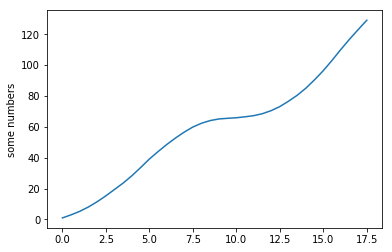

In [8]:
import random
#setting a random pos time vals
pos = [1]
change = 2
for x in range(1,10):
    pos.append(pos[x-1]+change)
    change += abs(random.random())
for x in range(10,20):
    pos.append(pos[x-1]+change)
    change -= random.random()
for x in range(20,32):
    pos.append(pos[x-1]+change)
    change += abs(random.random())
for x in range(32,36):
    pos.append(pos[x-1]+change)
    change -= abs(random.random())
# for x in range(36,40):
#     pos.append(pos[x-1]+change)
#     change += abs(random.random())
# for x in range(40,45):
#     pos.append(pos[x-1]+change)
#     change -= abs(random.random())
# for x in range(55,65):
#     pos.append(pos[x-1]+change)
#     change -= abs(random.random())
times = []
for x in range(len(pos)):
    times.append(x*0.5)

# for x in range(1,len(pos)-1,3):
#     pos[x] = pos[x] + random.randint(-3,3)

plt.plot(times,pos)
plt.ylabel('some numbers')
plt.show()

REPORT:
s2: [4.0, 4.582694267988373, 5.651986101808191, 6.769396483820515, 7.627483581945281, 8.298603751862256, 8.36885960936413, 9.458222558372853, 10.544652116432516, 9.6145658328591, 9.208512745386116, 8.362122472249084, 7.650580113126139, 6.618805926063814, 4.91571801648729, 3.457462937101184, 2.0692818534583637, 0.8512281499739345, 1.2343666740387675, 1.4923341308930844, 2.5518498671263217, 3.9299311420909078, 5.269575574954246, 6.957013974033373, 7.690737419203799, 9.237419381961871, 10.901909730119968, 11.755909896392808, 13.243973007989126, 13.275288322803704, 12.583060302232724, 12.225130636706126, 12.225130636706126]
t2: [0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 10.0, 10.5, 11.0, 11.5, 12.0, 12.5, 13.0, 13.5, 14.0, 14.5, 15.0, 16.0, 16.5, 17.0, 17.5]
[[0.0, 4.0], [10.0, 16.0]]
[[5.0, 9.0], [16.5, 17.5]]
1.82
-1.27


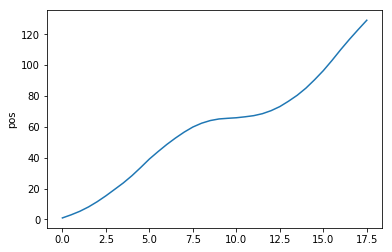

0.7062704564727937


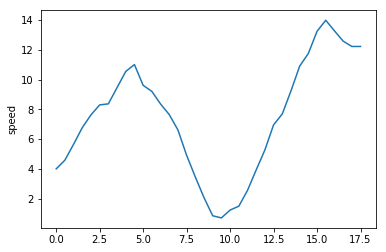

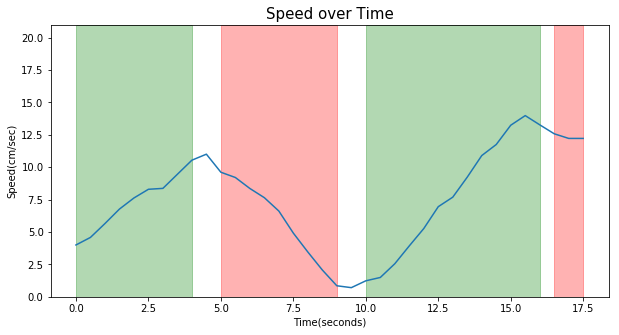

KeyboardInterrupt: 

In [9]:
import random
from graphics import *
windowSize = (1400,700)

def drawTitle(win):
    title = Text(Point(windowSize[0]/2,15), "The Speed of a particle")
    title.setSize(30)
    subtitle = Text(Point(windowSize[0]/2,50), "Cm travelled over time in seconds")
    subtitle.setSize(13)
    name = Text(Point(8*windowSize[0]/9,8*windowSize[1]/9), "Jake Frischmann")
    title.draw(win)
    subtitle.draw(win)
    name.draw(win)
    
def drawStats(win,time_interval,average_speed,distance_travelled,max_speed,inc_range,dec_range,acc_up,acc_down):
    stat_text_size = 15
    stat_x = 3*windowSize[0]/10
    stat_y = 2*windowSize[1]/10
    stat_h = 40
    timeInt = Text(Point(stat_x,stat_y), "Occures over " + str(time_interval) + " seconds.")
    timeInt.setSize(stat_text_size)
    timeInt.draw(win)
    av_speed = Text(Point(stat_x,stat_y+(stat_h)), "Reaches an average speed of " + str(average_speed) + " cm/sec.")
    av_speed.setSize(stat_text_size)
    av_speed.draw(win)
    dist = Text(Point(stat_x,stat_y+(stat_h*2)), "Travels " + str(distance_travelled) + " cm total.")
    dist.setSize(stat_text_size)
    dist.draw(win)
    max_s = Text(Point(stat_x,stat_y+(stat_h*3)), "Max speed of " + str(max_speed[1]) + " cm/sec at " + str(max_speed[0]) + " seconds.")
    max_s.setSize(stat_text_size)
    max_s.draw(win)
    acc_back = Rectangle(Point((stat_x*2.5-(2*stat_x/3)),stat_y-stat_h),Point((stat_x*2.5)+(2*stat_x/3),stat_y+(stat_h*4)))
    acc_back.setFill("light grey")
    acc_back.draw(win)
    acc_u = Text(Point(stat_x*2.5,stat_y), "Accelerating on intervals:  " + str(inc_range))
    acc_u.setSize(stat_text_size)
    acc_u.draw(win)
    av_acc_u = Text(Point(stat_x*2.5,stat_y+(stat_h)), "An average acceleration of " + str(acc_up) + " cm/sec^2")
    av_acc_u.setSize(stat_text_size)
    av_acc_u.draw(win)
    # acc_d = Text(Point(stat_x*2.5,stat_y(stat_h*2)), "Decelerating from "  str(dec_range[0])  " to "  str(dec_range[1])  " seconds.")
    acc_d = Text(Point(stat_x*2.5,stat_y+(stat_h*2)), "Decelerating on intervals:  " + str(dec_range))
    acc_d.setSize(stat_text_size)
    acc_d.draw(win)
    av_acc_d = Text(Point(stat_x*2.5,stat_y+(stat_h*3)), "An average deceleration of " + str(acc_down) + " cm/sec^2")
    av_acc_d.setSize(stat_text_size)
    av_acc_d.draw(win)


def main(positions, times): #cm, cs/sec, cm/sec^2
    DIGITS = 2
    time_interval = round(totalTime(times),DIGITS)
    distance_travelled = round(distTravelled(positions),DIGITS)
    average_speed = round(averageSpeed(positions, times),DIGITS)
    max_speed = maxSpeed(positions, times)
    inc_range, dec_range = accRange(positions,times)
    acc_up = round(averageAcc(positions, times,inc_range),DIGITS)
    acc_down = round(averageAcc(positions, times,dec_range),DIGITS)
    print(inc_range)
    print(dec_range)
    print(acc_up)
    print(acc_down)
    
    # times = times[1:len(times)-1]
    # positions = positions[1:len(positions)-1]
    
    plt.plot(times,positions)
    plt.ylabel('pos')
    plt.show()
    s = speeds(positions,times)
    print(min(s))
    plt.plot(times,s)
    plt.ylabel('speed')
    plt.show()
    
    # depict time series
    fig, ax = plt.subplots(figsize=(10,5))
    ymin, ymax = plt. ylim()
    ax.plot(times,s)
    plt.ylim(ymin * min(s), ymax * max(s)*3/2)
    
    # adjust label
    ax.set_ylabel("Speed(cm/sec)")
    ax.set_xlabel("Time(seconds)")
    
    # assign title
    ax.set_title("Speed over Time" ,size=15)
    for index in range(len(inc_range)):
        ax.axvspan(inc_range[index][0], inc_range[index][1], color="green", alpha=0.3)
    for index in range(len(dec_range)):
        ax.axvspan(dec_range[index][0], dec_range[index][1], color="red", alpha=0.3)

    # plt.savefig("Data Graphs/Speed_Time.png")
    plt.show()
    
    win = GraphWin("Data Analysis", windowSize[0], windowSize[1], False)
    pos_time_chart = Image(Point(3*windowSize[0]/10,10*windowSize[1]/15), "Data Graphs/pos_time3.png")
    pos_time_chart.draw(win)
    speed_time_chart = Image(Point(11*windowSize[0]/15,11*windowSize[1]/15), "Data Graphs/speed_time3.png")
    speed_time_chart.draw(win)
    
    drawTitle(win)
    drawStats(win,time_interval,average_speed,distance_travelled,max_speed,inc_range,dec_range,acc_up,acc_down)
        
    win.getMouse()





if __name__ == '__main__':   
    #position data is in cm, time data is in seconds
    pos2 = [0, 0.18, 0.49, 0.82, 1.25, 1.6, 2.05, 2.5, 2.95, 3.45, 4, 4.5, 5.1, 5.65, 6.3, 6.95, 7.6, 8.3, 9.02,
                  9.75, 10.55, 11.25, 12.15, 12.95, 13.7, 14.58, 15.35, 16.25, 17, 18, 19, 19.75, 20.7, 21.55, 22.25,
                  23.25, 24, 24.65, 25.5, 26.35, 27, 27.6, 28.3, 28.95, 29.5, 30.1, 30.75, 31.2, 31.75, 32.3, 32.7,
                  33.2, 33.55, 34, 34.4, 34.75, 35, 35.3, 35.5, 35.75, 36, 36.25, 36.45, 36.7]
    times2 = [0.000, 0.033, 0.067, 0.100, 0.133, 0.167, 0.200, 0.233, 0.267, 0.300, 0.333, 0.367, 0.400, 0.433, 0.467,
              0.500, 0.533, 0.567, 0.600, 0.633, 0.667, 0.700, 0.733, 0.767, 0.800, 0.833, 0.867, 0.900, 0.933, 0.967,
              1.000, 1.033, 1.067, 1.100, 1.133, 1.167, 1.200, 1.233, 1.267, 1.300, 1.333, 1.367, 1.400, 1.433, 1.467,
              1.500, 1.533, 1.567, 1.600, 1.633, 1.667, 1.700, 1.733, 1.767, 1.800, 1.833, 1.867, 1.900, 1.933, 1.967,
              2.000, 2.033, 2.067, 2.100]
    
    print("REPORT:")
    main(pos, times)


s2: [14.0, 18.0, 18.0, 32.0, 44.0, 54.0, 54.0, 54.0, 52.0, 46.0, 34.0, 37.23081653988493, 34.68386168071561, 38.95181370680871, 45.67050743957225, 51.61394775469557, 48.34161286756853, 48.09521266513184, 42.69321947698245, 41.47767741368034, 40.671662969069075, 38.85584724334967, 38.85584724334967]
t2: [-0.0, -1.0, -1.5, -2.5, -4.0, -5.0, -5.5, -6.0, -7.0, -7.5, -11.5, -14.5, -16.0, -17.5, -20.5, -25.0, -27.0, -27.5, -30.0, -30.5, -31.0, -31.5, -32.0]
[[-0.0, -5.0], [-17.5, -25.0]]
[[-5.5, -11.5], [-27.0, -32.0]]
-4.84
2.62


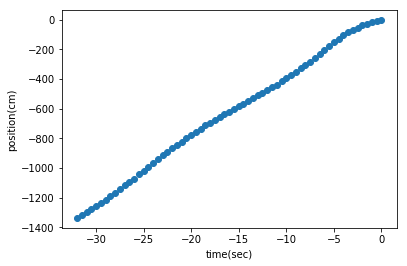

12.0


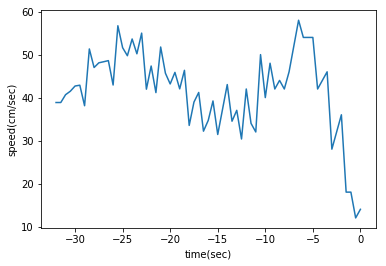

OSError: [Errno 9] Bad file descriptor

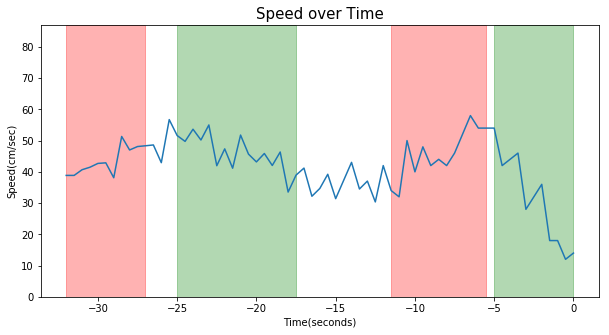

In [101]:
def save(positions,times):
    DIGITS = 2
    time_interval = round(totalTime(times),DIGITS)
    distance_travelled = round(distTravelled(positions),DIGITS)
    average_speed = round(averageSpeed(positions, times),DIGITS)
    max_speed = maxSpeed(positions, times)
    inc_range, dec_range = accRange(positions,times)
    acc_up = round(averageAcc(positions, times,inc_range),DIGITS)
    acc_down = round(averageAcc(positions, times,dec_range),DIGITS)
    print(inc_range)
    print(dec_range)
    print(acc_up)
    print(acc_down)
    
    # times = times[1:len(times)-1]
    # positions = positions[1:len(positions)-1]
    
    plt.scatter(times,positions)
    plt.ylabel('position(cm)')
    plt.xlabel('time(sec)')
    plt.show()
    s = speeds(positions,times)
    print(min(s))
    plt.plot(times,s)
    plt.ylabel('speed(cm/sec)')
    plt.xlabel('time(sec)')
    plt.show()
    
    # depict time series
    fig, ax = plt.subplots(figsize=(10,5))
    ymin, ymax = plt. ylim()
    ax.plot(times,s)        
    plt.ylim(ymin * min(s), ymax * max(s)*3/2) # change max and min for oppisite (neg pos to pos pos or neg neg)
    
    # adjust label
    ax.set_ylabel("Speed(cm/sec)")
    ax.set_xlabel("Time(seconds)")
    
    # assign title
    ax.set_title("Speed over Time" ,size=15)
    for index in range(len(inc_range)):
        ax.axvspan(inc_range[index][0], inc_range[index][1], color="green", alpha=0.3)
    for index in range(len(dec_range)):
        ax.axvspan(dec_range[index][0], dec_range[index][1], color="red", alpha=0.3)

    plt.savefig("Data Graphs/Speed_Time.png")
    plt.show()
    
possy = []
timme = []
for x in range(len(pos)):
    possy.append(pos[x]*-1)
for x in range(len(times)):
    timme.append(times[x]*-1)
save(possy,timme)